<a href="https://colab.research.google.com/github/mahima0811gupta/Machine-learning-project/blob/main/data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np

In [85]:
data = pd.read_csv('/content/Mayur Vihar anganwadi Ghaziabad..csv')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Domain     20 non-null     object
 1   Task       20 non-null     object
 2   AGE Group  20 non-null     object
 3   TRIAL1     20 non-null     int64 
 4   TRIAL2     20 non-null     int64 
 5   TRIAL3     20 non-null     int64 
 6   TRIAL4     20 non-null     int64 
 7   TRIAL5     20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


In [87]:
data.describe()

,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.900000,0.700000,0.850000,0.850000,0.750000
std,0.307794,0.470162,0.366348,0.366348,0.444262
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.750000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
data = data.dropna()

In [89]:
data.isnull().sum()

,0
Domain,0
Task,0
AGE Group,0
TRIAL1,0
TRIAL2,0
TRIAL3,0
TRIAL4,0
TRIAL5,0


In [90]:
data.head()

,Domain,Task,AGE Group,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
0,Aesthetic,Egg Farm,5-6,0,0,0,1,1
1,Aesthetic,Ege Farm,3-4,1,0,1,1,1
2,Aesthetic,Ege Farm,4-5,1,0,0,0,0
3,Aesthetic,Ege Farm,5-6,1,0,1,1,1
4,Aesthetic,Ege Farm,4-5,0,0,0,0,0


In [91]:
data.tail()

,Domain,Task,AGE Group,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
15,Aesthetic,Habitate,5-6,1,1,1,1,1
16,Aesthetic,Habitate,3-4,1,1,1,1,1
17,Aesthetic,Habitate,4-5,1,1,1,1,1
18,Aesthetic,Habitate,5-6,1,1,1,1,1
19,Aesthetic,Habitate,4-5,1,0,1,1,0


In [105]:
# Calculate the mean score across all trials for each row (each participant)
data['Average_Score'] = data[['TRIAL1', 'TRIAL2', 'TRIAL3', 'TRIAL4', 'TRIAL5']].mean(axis=1)

# Now group by 'Task' and 'AGE Group' to get the average score for each group
task_age_scores = data.groupby(['Task', 'AGE Group'])['Average_Score'].mean().reset_index()
task_age_scores.columns = ['Task', 'AGE Group', 'Average_Score']

task_age_scores


,Task,AGE Group,Average_Score
0,Ege Farm,3-4,0.8
1,Ege Farm,4-5,0.1
2,Ege Farm,5-6,0.8
3,Egg Farm,5-6,0.4
4,Habitate,3-4,1.0
5,Habitate,4-5,0.8
6,Habitate,5-6,1.0
7,Pattern,3-4,1.0
8,Pattern,4-5,0.9
9,Pattern,5-6,1.0


In [106]:
# Calculate standard deviation across trials for each row as a measure of variability
data['Variability'] = data[['TRIAL1', 'TRIAL2', 'TRIAL3', 'TRIAL4', 'TRIAL5']].std(axis=1)

# Calculate mean variability for each task and age group
task_age_variability = data.groupby(['Task', 'AGE Group'])['Variability'].mean().reset_index()
task_age_variability.columns = ['Task', 'AGE Group', 'Average_Variability']

task_age_variability


,Task,AGE Group,Average_Variability
0,Ege Farm,3-4,0.447214
1,Ege Farm,4-5,0.223607
2,Ege Farm,5-6,0.447214
3,Egg Farm,5-6,0.547723
4,Habitate,3-4,0.000000
5,Habitate,4-5,0.273861
6,Habitate,5-6,0.000000
7,Pattern,3-4,0.000000
8,Pattern,4-5,0.223607
9,Pattern,5-6,0.000000


In [107]:
# Merge task-age scores and variability
task_age_analysis = pd.merge(task_age_scores, task_age_variability, on=['Task', 'AGE Group'])
task_age_analysis


,Task,AGE Group,Average_Score,Average_Variability
0,Ege Farm,3-4,0.8,0.447214
1,Ege Farm,4-5,0.1,0.223607
2,Ege Farm,5-6,0.8,0.447214
3,Egg Farm,5-6,0.4,0.547723
4,Habitate,3-4,1.0,0.000000
5,Habitate,4-5,0.8,0.273861
6,Habitate,5-6,1.0,0.000000
7,Pattern,3-4,1.0,0.000000
8,Pattern,4-5,0.9,0.223607
9,Pattern,5-6,1.0,0.000000


In [108]:
# Apply classification for performance and variability
task_age_analysis['Performance_Category'] = task_age_analysis['Average_Score'].apply(
    lambda x: 'Strength' if x > score_threshold else 'Improvement Area'
)
task_age_analysis['Variability_Category'] = task_age_analysis['Average_Variability'].apply(
    lambda x: 'High Variability' if x > variability_threshold else 'Low Variability'
)

print(task_age_analysis)

        Task AGE Group  Average_Score  Average_Variability  \
0   Ege Farm       3-4            0.8             0.447214   
1   Ege Farm       4-5            0.1             0.223607   
2   Ege Farm       5-6            0.8             0.447214   
3   Egg Farm       5-6            0.4             0.547723   
4   Habitate       3-4            1.0             0.000000   
5   Habitate       4-5            0.8             0.273861   
6   Habitate       5-6            1.0             0.000000   
7    Pattern       3-4            1.0             0.000000   
8    Pattern       4-5            0.9             0.223607   
9    Pattern       5-6            1.0             0.000000   
10    Shadow       3-4            0.8             0.447214   
11    Shadow       4-5            0.9             0.223607   
12    Shadow       5-6            1.0             0.000000   

   Performance_Category Variability_Category  
0      Improvement Area      Low Variability  
1      Improvement Area      Low Vari

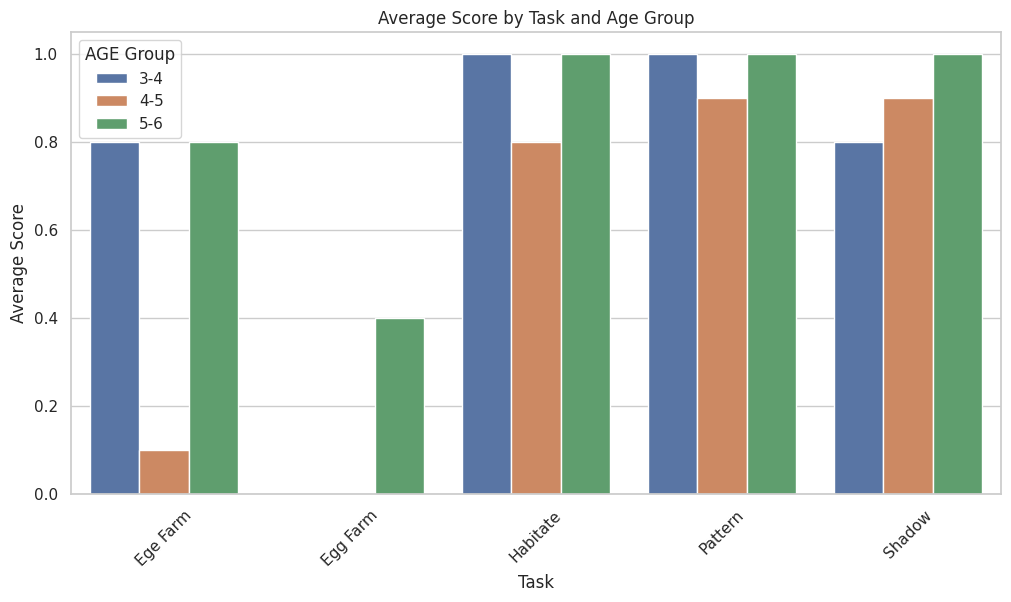

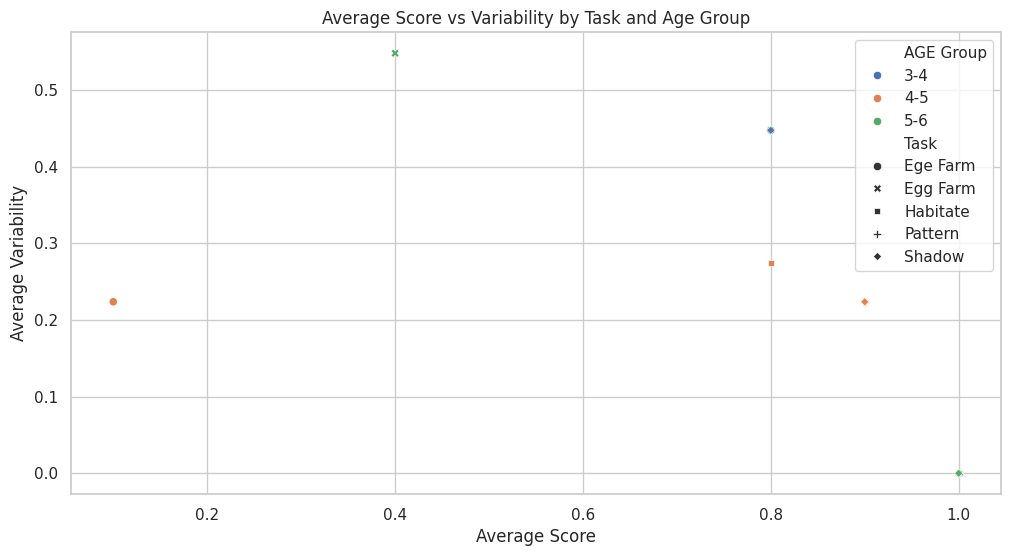

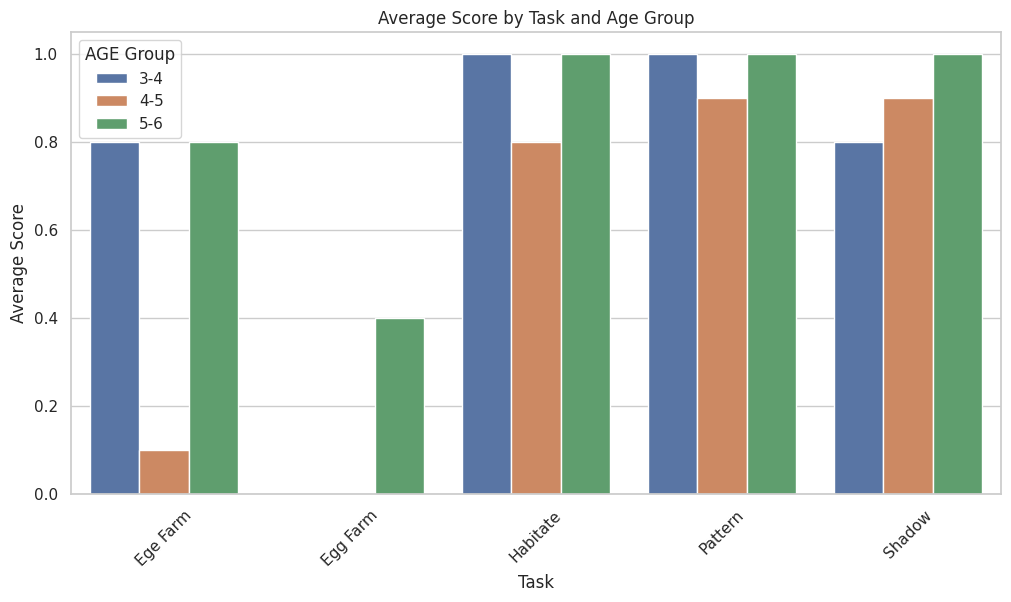

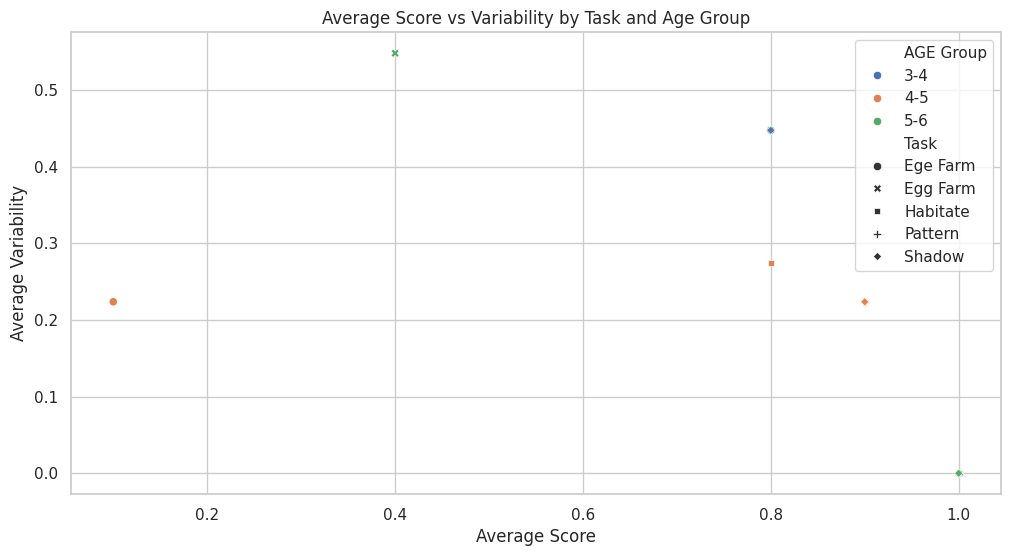

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Plot Average Score by Task and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=task_age_analysis, x='Task', y='Average_Score', hue='AGE Group')
plt.title('Average Score by Task and Age Group')
plt.xlabel('Task')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='AGE Group')
plt.show()

# Scatter plot for Average Score vs Variability by Task and Age Group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=task_age_analysis, x='Average_Score', y='Average_Variability', hue='AGE Group', style='Task')
plt.title('Average Score vs Variability by Task and Age Group')
plt.xlabel('Average Score')
plt.ylabel('Average Variability')
plt.show()


# Set plot style
sns.set(style='whitegrid')

# Plot Average Score by Task and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=task_age_analysis, x='Task', y='Average_Score', hue='AGE Group')
plt.title('Average Score by Task and Age Group')
plt.xlabel('Task')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='AGE Group')
plt.show()

# Scatter plot for Average Score vs Variability by Task and Age Group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=task_age_analysis, x='Average_Score', y='Average_Variability', hue='AGE Group', style='Task')
plt.title('Average Score vs Variability by Task and Age Group')
plt.xlabel('Average Score')
plt.ylabel('Average Variability')
plt.show()
